In [1]:
##!pip install imblearn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cd datasets

/Users/zhouxinrong/Desktop/PRESC/datasets


In [5]:
Surgical_data = pd.read_csv("Surgical-deepnet.csv")

In [6]:
Surgical_data

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [7]:
Surgical_data1 = pd.DataFrame(Surgical_data, columns=["bmi","Age","complication"])

In [8]:
Surgical_data1.describe()

,bmi,Age,complication
count,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.252135
std,8.152709,18.088191,0.434253
min,2.150000,6.100000,0.000000
25%,26.510000,51.500000,0.000000
50%,28.980000,59.700000,0.000000
75%,35.295000,74.700000,1.000000
max,92.590000,90.000000,1.000000


## Predict complication based on BMI and age


,Correlation
bmi,-0.142174
Age,-0.111327


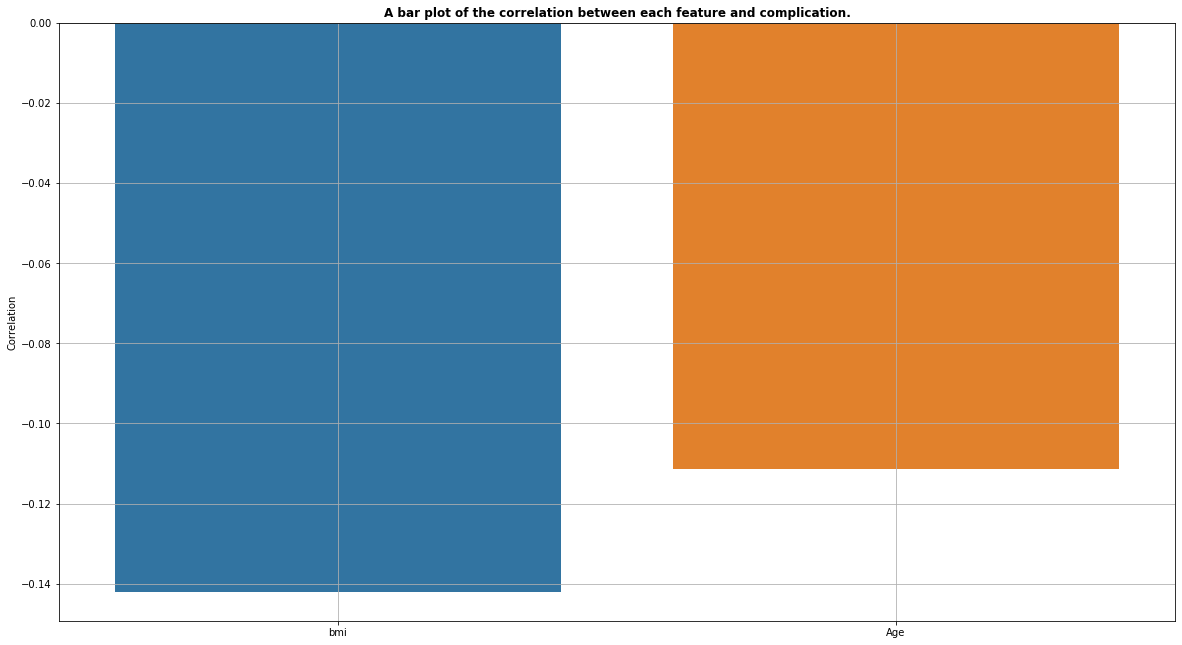

In [9]:
corr = pd.DataFrame(Surgical_data1[Surgical_data1.columns[0:]].corr()["complication"][:])
plt.figure(figsize=(20,11))
corr = corr.drop(index="complication")
corr.columns = ['Correlation']
sns.barplot(corr.index, corr.Correlation)
plt.grid()
plt.title("A bar plot of the correlation between each feature and complication.", fontweight="bold")
corr

create X(input sets) and Y(output/prediction sets)

In [10]:
X = Surgical_data1.drop(["complication"], axis=1)
y = Surgical_data1["complication"]


In [11]:
import warnings
warnings.filterwarnings('ignore')

def train_predict(X, y, model, verbose=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_mat =  confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    probs = model.predict_proba(X_test)
    
    print("Accuracy Score of the SVM classifier: \n", acc)
    print("The confusion Matrix: \n", conf_mat)
    print("Recall = ", recall_score(y_test, y_pred))
    print("F1_score = ", f1_score(y_test, y_pred))
    
    #plot the heatmap for the confusio matrix.
    #visuals ease comprehension of information and this justifies why 
    #I want a heatmap to be produced each time this functions is used.
    if verbose:
        plt.figure(figsize=(8,8))
        sns.heatmap(conf_mat, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
    return X_test, y_test, y_pred, probs

Accuracy Score of the SVM classifier: 
 0.7728049197130168
The confusion Matrix: 
 [[2237    0]
 [ 665   25]]
Recall =  0.036231884057971016
F1_score =  0.06993006993006994


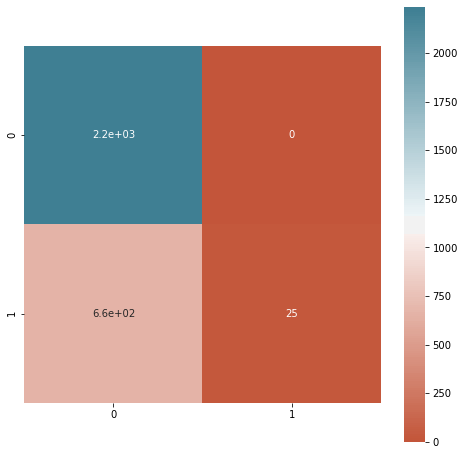

In [12]:
diabetes_classifier = svm.SVC(probability=True)
xtest, ytest, y_pred, probs = train_predict(X, y, diabetes_classifier, verbose=True)

Even though the acuuracy score is not so bad, the model is actually predicting mostly 0, which is not a good model. Also the Recall score and F1 score is not so good.

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_cur(probs, y_test):
    
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
    
    fig, ax = plt.subplots(figsize=(20,13))
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, color='blue',LineWidth = 3, label='ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Area Under the Receiver Operating Characteristics Curve,")
    plt.grid()
    plt.legend()
    plt.show()

AUC: 0.54


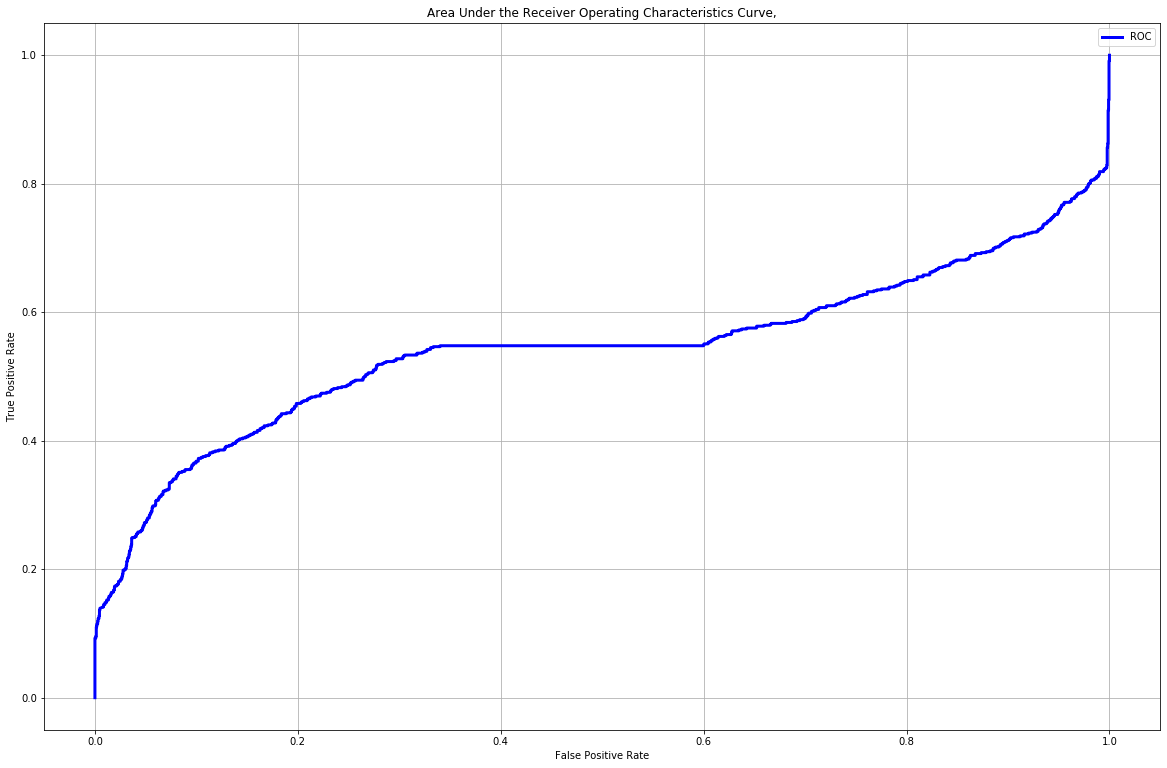

In [14]:
plot_roc_cur(probs, ytest)

Because of the imbalance of our data. We will try to do SMOTE resampling on our data 

In [15]:
from imblearn.over_sampling import SMOTE
def SMOTE_resampling(X, y):
    """
    Inputs: X the data set of all explanatory variables
            y in the target variable
            
    Functionality: This function is used when there is imablance in the data set.
                   It uses the SMOTE resampling method to generate synthetic points from the minority
                   class to increase it's cardinality.
    Outputs: The output is a data set(data frame) of explanatory variables and the target variable with increased
             number of data points in the minority class.
    """
    smote = SMOTE(random_state = 42)
    x_resampled, y_resampled = smote.fit_resample(X, y)
    return x_resampled, y_resampled

In [16]:
x_resampled, y_resampled = SMOTE_resampling(X, y)
Xtest, ytest, y_pred, probs = train_predict(x_resampled, y_resampled, diabetes_classifier)

Accuracy Score of the SVM classifier: 
 0.7201918684330745
The confusion Matrix: 
 [[1400  799]
 [ 426 1753]]
Recall =  0.8044974759063791
F1_score =  0.7410695413231875


After resampling, even though the accuracy score lowers down a little bit, we can see that the recall score and f1 score is much better. Also, in the confusion matrix, we can see that we have more TP and TN results.

# use the misclass rate feature to analysis this model

In [17]:
from presc.misclassifications.misclass_rate import show_misclass_rates_features

In [18]:
testset = pd.concat([Xtest, ytest], axis=1)
print(testset.columns)
print(list(testset.columns))
print(list(testset.columns)[:-1])

Index(['bmi', 'Age', 'complication'], dtype='object')
['bmi', 'Age', 'complication']
['bmi', 'Age']


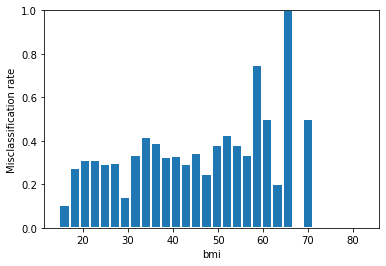

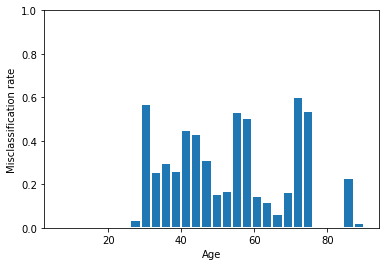

In [19]:
show_misclass_rates_features(testset,y_pred,bins=30)

Each spike represents the misclassification rate on the certain interval of the feature that binned into 30 groups.

The spikes on first graph represents the misclassification rate on different bmi interval, there are 30 different intervals.

The spikes on first graph represents the misclassification rate on different age interval, there are 30 different intervals.

forward regression does not help in this case. I am only put it here as a reference.

In [20]:
import statsmodels.api as sm
def forward_regression(X, y, threshold_in, verbose=False):
    """
    Inputs: X the data set of all explanatory variables
            y in the target variable
            threshold_in represents the maximum value of the p_value
            for a variable to be considered important.
            verbose permits the printing ot the selected variables and their
            corresponding accuracies.
    Functionality: This is forward regression implementation which starts with an empty 
                   set of feautures. The most important feautures are determined using 
                   the ordinary least squares(OLS) regression method. OLS determines the
                   importance of each variable using the principle of least squares. The 
                   OLS calculates the p-valeu and compare with the threshold which is specified.
                   A variable with a p-value lower than the threshold is considered to have a 
                   significant effect on the target variable.
    Outputs: returns a list of the most important feautures in the data set
    """
    included = []
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included